In [1]:
%matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns



import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf

import geopandas as gpd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

saveFigures is set to: True
Done loading packages


In [2]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 

In [3]:
# Get case data
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

df = pd.read_csv(latestdir+'/Regionalt_DB/25_indl_varighed_dag_region.csv',encoding='latin1',delimiter=';')
df2 = pd.read_csv(latestdir+'/Regionalt_DB/26_indl_varighed_uge_region_alder.csv',encoding='latin1',delimiter=';')
df['Dato'] = pd.to_datetime(df['Dato'])


import datetime
df2['Dato'] = np.array([np.datetime64(datetime.datetime.strptime(x + '-1', "%Y-W%W-%w")) for x in df2.Uge])

In [8]:
display(df.tail())
display(df2.tail(20))


,Dato,Region,Længde af indlæggelse,Antal borgere
5210,2022-03-07,Nordjylland,Lang,7
5211,2022-03-07,Sjælland,Kort,17
5212,2022-03-07,Sjælland,Lang,33
5213,2022-03-07,Syddanmark,Kort,5
5214,2022-03-07,Syddanmark,Lang,45


,Uge,Region,Aldersgruppe,Længde af indlæggelse,Antal borgere,Dato
4347,2022-W09,Sjælland,65-79,Lang,91,2022-02-28
4348,2022-W09,Sjælland,65-79,Kort,27,2022-02-28
4349,2022-W09,Sjælland,80+,Lang,71,2022-02-28
4350,2022-W09,Sjælland,80+,Kort,9,2022-02-28
4351,2022-W09,Syddanmark,00-02,Lang,19,2022-02-28
4352,2022-W09,Syddanmark,00-02,Kort,1,2022-02-28
4353,2022-W09,Syddanmark,03-05,Lang,4,2022-02-28
4354,2022-W09,Syddanmark,03-05,Kort,1,2022-02-28
4355,2022-W09,Syddanmark,06-11,Lang,4,2022-02-28
4356,2022-W09,Syddanmark,12-15,Lang,4,2022-02-28


(0.0, 421.0)

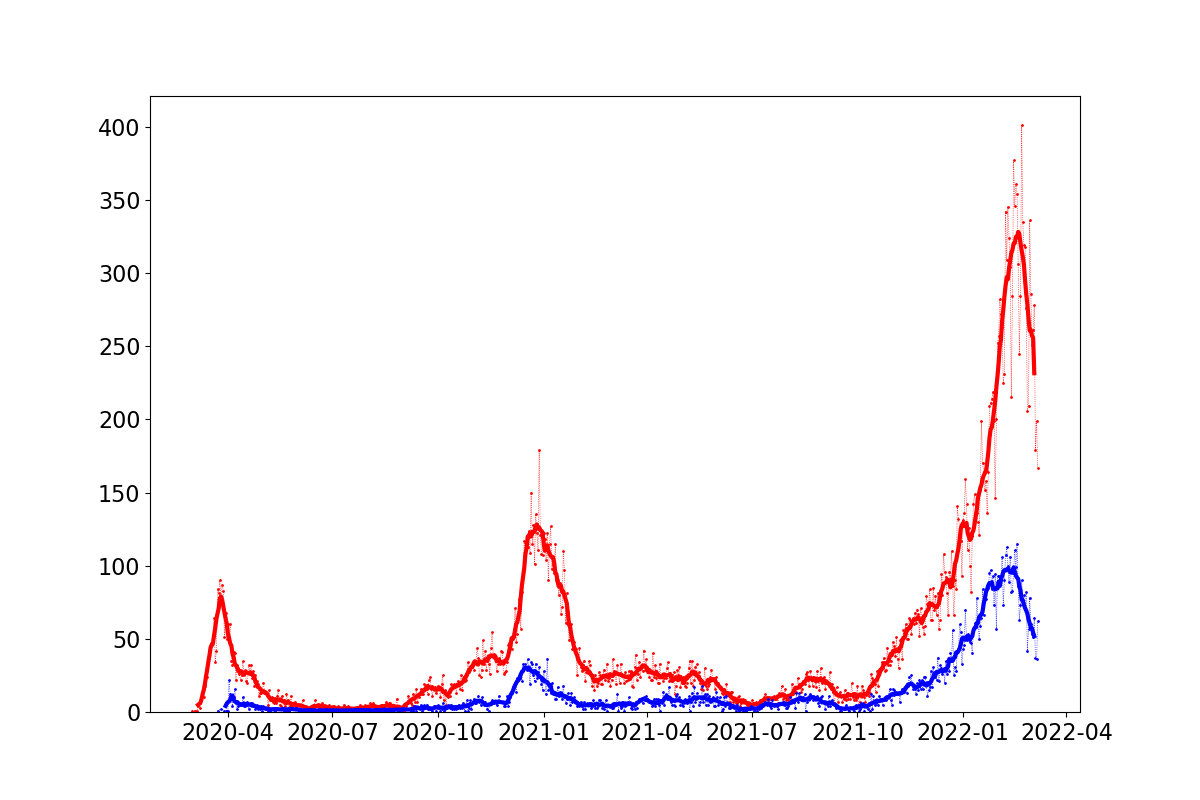

In [5]:

allLong = df[df['Længde af indlæggelse'] == 'Lang'].groupby('Dato').sum()
allShort = df[df['Længde af indlæggelse'] == 'Kort'].groupby('Dato').sum()

fig,ax1 = plt.subplots()
 
ax1.plot(allLong.index,allLong['Antal borgere'],'r.:',markersize=2,linewidth=0.5)
ax1.plot(pf.rnTime(allLong.index),pf.rnMean(allLong['Antal borgere']),color='r')
ax1.plot(allShort.index,allShort['Antal borgere'],'b.:',markersize=2,linewidth=0.5)
ax1.plot(pf.rnTime(allShort.index),pf.rnMean(allShort['Antal borgere']),color='b')

ax1.set_ylim(bottom=0)


In [6]:
# df2
allShort 
dfAll = pd.merge(allLong,allShort,on='Dato',how='outer',suffixes=['Long','Short'])
dfAll = dfAll.sort_values(by='Dato')
dfAll['Antal borgereLong'] = dfAll['Antal borgereLong'].fillna(0)
dfAll['Antal borgereShort'] = dfAll['Antal borgereShort'].fillna(0)

dfAll = dfAll.rename(columns={'Antal borgereLong':'Lang','Antal borgereShort':'Kort'})

dfAll.index = pd.to_datetime(dfAll.index)
dfAll.tail()


,Lang,Kort
Dato,,
2022-03-03,261.0,51.0
2022-03-04,278.0,64.0
2022-03-05,179.0,37.0
2022-03-06,199.0,36.0
2022-03-07,167.0,62.0


(0.0, 1.0)

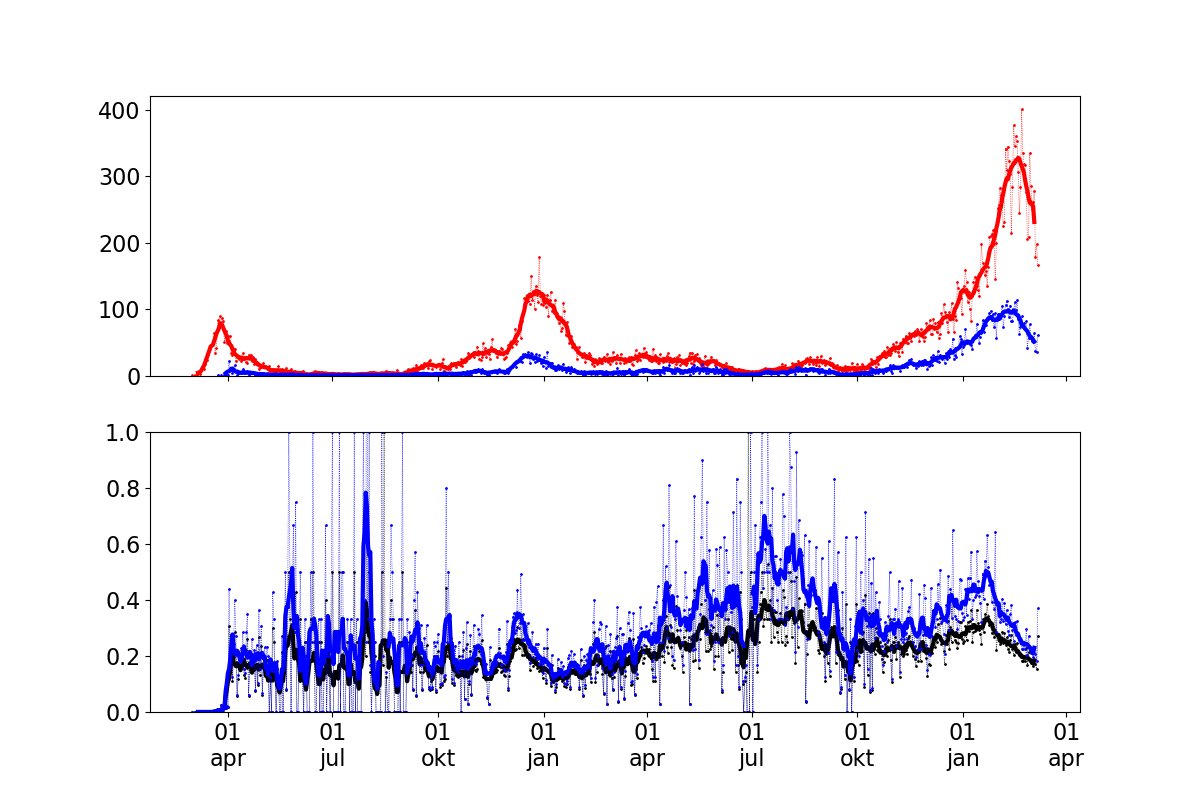

In [7]:

fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

 
ax1.plot(allLong.index,allLong['Antal borgere'],'r.:',markersize=2,linewidth=0.5)
ax1.plot(pf.rnTime(allLong.index),pf.rnMean(allLong['Antal borgere']),color='r')
ax1.plot(allShort.index,allShort['Antal borgere'],'b.:',markersize=2,linewidth=0.5)
ax1.plot(pf.rnTime(allShort.index),pf.rnMean(allShort['Antal borgere']),color='b')

ax1.set_ylim(bottom=0)

curRatio = dfAll.Kort/(dfAll.Lang + dfAll.Kort)
pf.plotMean(dfAll.index,curRatio,ax2,color='k')
curRatio = dfAll.Kort/(dfAll.Lang)
pf.plotMean(dfAll.index,curRatio,ax2,color='b')
# ax2.plot(dfAll.index,curRatio)

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))

ax2.set_ylim([0,1])